In [2]:
import csv
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import datetime
from datetime import date
import calendar
from math import pi
#from bokeh.io import show, output_file, output_notebook, reset_output
from bokeh.layouts import column
from bokeh.plotting import figure, output_file, show, output_notebook, reset_output
from bokeh.models import ColumnDataSource, Plot, LinearAxis, Grid, RangeTool
from bokeh.models.glyphs import Line
from bokeh.transform import cumsum
from bokeh.core.properties import value
from bokeh.palettes import Category20
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline
import re

register_matplotlib_converters()
import os

from wordcloud import WordCloud
    

In [2]:
# numeros totales

#palabras promedio por mensaje por usuario
# palabras mas comunes del grupo por año
# palabras mas comunes por usuario




### Import de csv from whatsapp - data formatting

In [ ]:
#read del csv exportado del whatsapp group deseado
#contiene un string por mensaje enviado con información de fecha, usuario y texto

with open('whatsap-group-chat.txt', 'r', encoding="utf8") as myfile:
  data = myfile.read()
sentences = data.split('\n')  
len(sentences)

In [94]:
# producimos y guardamos el DataFrame.
# columnas [user, date, text]

df = pd.DataFrame()
for i in range(1,len(sentences)-1):
    date=None
    usertext=None
    user=None
    text=None
    try:
        date = sentences[i].split('-',1)[0].strip()
        usertext = sentences[i].split('-')[1].strip()
        user = usertext.split(':',1)[0].strip()
        text = usertext.split(':',1)[1].strip()
    except IndexError: 
        pass
    
    
    
    serie = pd.Series([user, date, text], index=['user', 'date', 'text'])
    df = df.append(serie, ignore_index=True)
export_csv = df.to_csv (r'chats-data')


In [3]:
df = pd.read_csv('chats-data') 

In [4]:
#drop de registros con datos nulos

print(df.shape,' tamaño antes de dropear')
df = df.dropna(axis=0, how='any') # tira las filas que tienen al menos un registro NaN/NaT 
print(df.shape,' tamaño despues de dropear')

(133500, 4)  tamaño antes de dropear
(126147, 4)  tamaño despues de dropear


In [12]:
#convierte la columna date a formato DateTime
df.date = pd.to_datetime(df.date,format='%d/%m/%y %H:%M', errors='coerce')

#crea nuevas columnas en base a datos de fecha

df['week'] = df.date.dt.week
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['weekdaynr'] = df.date.dt.weekday
df['hour'] = df.date.dt.hour
df['date3'] = df.date.dt.date
df['date4'] = df.date.dt.strftime('%m-%Y')
df['weekdaynr'] = df.date.dt.weekday
    
    
    
#dropeamos registros incompletos posterior a la conversión datetime

print(df.shape,' tamaño antes de dropear excepciones coerce / NaT values')
df = df.dropna(axis=0, how='any') # tira las filas que tienen al menos un registro NaN/NaT 
print(df.shape,' tamaño despues de dropear expepciones coerce / NaT values')
df.sample(3)


(126143, 11)  tamaño antes de dropear excepciones coerce / NaT values
(126143, 11)  tamaño despues de dropear expepciones coerce / NaT values


,Unnamed: 0,date,text,user,week,year,month,weekdaynr,hour,date3,date4
120201,120201,2019-08-10 15:36:00,Me la baja cada mañana esa impresora,Pelado Ale,32,2019,8,5,15,2019-08-10,08-2019
93851,93851,2018-10-26 18:31:00,Porque? No hay porque,Joaquin,43,2018,10,4,18,2018-10-26,10-2018
1745,1745,2016-04-03 16:05:00,El dream,Sebi Cell,13,2016,4,6,16,2016-04-03,04-2016


In [8]:
df['weekdaynr'] = df.date.dt.weekday

#creamos la columna weekday acorde al dia de la semana

weekDays = ["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
df['weekday'] = df['weekdaynr'].apply(lambda x: weekDays[x])


### DataFrame - sample

In [63]:
df.sample(5)

,Unnamed: 0,date,text,user,week,year,month,weekdaynr,hour,date3,date4,weekday
79037,79037,2018-06-11 23:09:00,👏🏼👏🏼👏🏼,Marto Ná,24,2018,6,0,23,2018-06-11,06-2018,Lunes
124768,124768,2019-09-22 12:01:00,Ah,Sebi Cell,38,2019,9,6,12,2019-09-22,09-2019,Domingo
54708,54708,2017-09-11 07:46:00,Feliz dia a los troesmas!,Muse Cell,37,2017,9,0,7,2017-09-11,09-2017,Lunes
73155,73155,2018-04-19 23:25:00,Jorge y Alberto.,Iña Cell,16,2018,4,3,23,2018-04-19,04-2018,Jueves
126772,126772,2019-10-12 12:50:00,<Multimedia omitido>,Shafal,41,2019,10,5,12,2019-10-12,10-2019,Sabado


# --- Data Analytics  ---

### lineplot - mensajes por día 

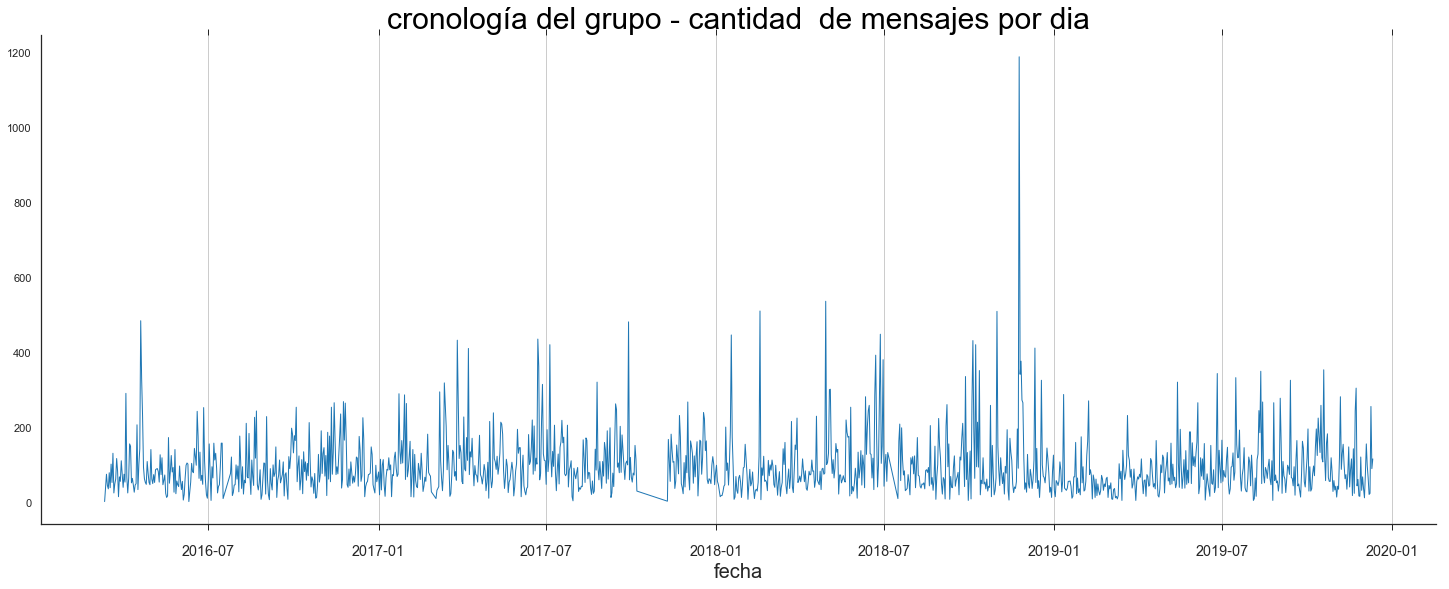

In [26]:
# agrupamos datos por día en un dataframe y producimos un lineplot

df_graph1 = df.groupby('date3').count()

a4_dims = (25, 9)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(style="white")

plt.xlabel('fecha', fontsize=20)
x = df_graph1.index
y = df_graph1.text

ax.tick_params(axis='x',pad=15,labelsize='large', reset=True, gridOn=True ,width=1)
dates = df['date4']

data = df_graph1.text
datamean = data.rolling(5).mean()
sns.despine()
plt.title('cronología del grupo - cantidad  de mensajes por dia', fontsize=30, color="black")

sns.lineplot(data=[data], palette="tab10", linewidth=1, legend=False)

In [14]:
print('Cantidad de mensajes totales del grupo estudiados:',df.text.count())
print('Cantidad de mensajes promedio por dia:',round(df_graph1.date.mean(), 0))
print('top cinco dias mas activos',df_graph1.date.sort_values(ascending=False)[0: 5])

Cantidad de mensajes totales del grupo estudiados: 126143
Cantidad de mensajes promedio por dia: 96.0
top cinco dias mas activos date3
2018-11-24    1189
2018-04-29     536
2018-02-17     510
2018-10-31     509
2016-04-19     484
Name: date, dtype: int64


In [25]:
#sample del día con mayor actividad del grupo

top_chat_day = df_graph1.date.sort_values(ascending=False).index[0]

print('15 mensajes random del dia mas activo del grupo:',top_chat_day)
df.loc[df['date3'] == top_chat_day].text.sample(5)

15 mensajes random del dia mas activo del grupo: 2018-11-24


97411    no me convenzo de nada
97753                Bien gordo
97146                    exacto
97710            que sea rock 🥑
96767      <Multimedia omitido>
Name: text, dtype: object


### lineplot - comportamiento por horas por año

tomando el comportamiento del último año
hora del día con mayor actividad para mejorar tu probabilidad de lectura de tu mensaje -- 12 hs
hora del día con menor actividad para decir algo y pasar desapercibido -- 5 hs


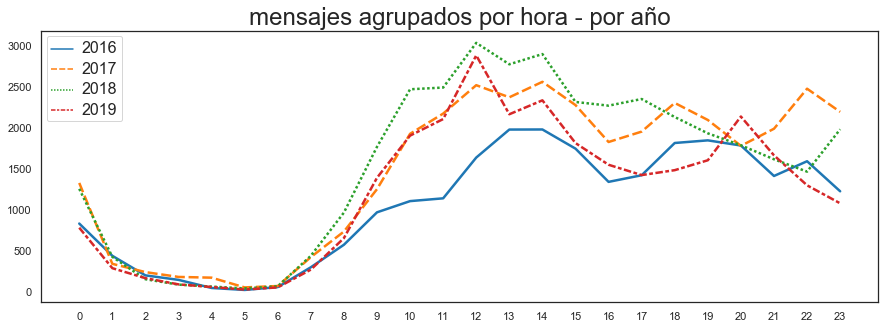

In [26]:
#producimos el grupo de datos agrupados por hora del dia por año para estudiar el comportamiento 
#por hora del grupo

years_lists = df.year.unique()
df_graph2 = pd.DataFrame()

for i in years_lists:
    serie_graph2 = df.loc[df['year'] == i].groupby('hour').count().text.transpose()#.drop(index=i)
    df_graph2 = df_graph2.append(serie_graph2, ignore_index=True)
    
df_graph2.index = years_lists
df_graph2.index = df_graph2.index.astype('int') 



a4_dims = (15, 5)
fig, ax = plt.subplots(figsize=a4_dims)

plt.title('mensajes agrupados por hora - por año', fontsize=24)
sns.set()


sns.set(style="whitegrid")
data = df_graph2.transpose()
sns.lineplot(data=data, palette="tab10", linewidth=2.5, legend="full")
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text

ax.set_xticks(sorted(df.hour.unique()))

ultimo_año_msg_x_hora = data[data.columns[-1]]
print('tomando el comportamiento del último año')
print('hora del día con mayor actividad para mejorar tu probabilidad de lectura de tu mensaje --',ultimo_año_msg_x_hora.idxmax(),'hs') 
print('hora del día con menor actividad para decir algo y pasar desapercibido --',ultimo_año_msg_x_hora.idxmin(),'hs')

### stacked graph - actividad por usuario por año

In [28]:
#preparamos los datos
#agrupamos datos para estudiar gráfico de actividad por usuario por año-

df_graph3 = df[['year','user','text']].groupby(['year','user']).count()
df_graph3 = df_graph3.sort_values(by=['year','text'], ascending=[False,False])
df_grpah_unstacked = df_graph3.unstack().transpose()
df_grpah_unstacked.index = [i[1] for i in df_grpah_unstacked.index]
df_grpah_unstacked = df_grpah_unstacked.fillna(0)

dict1 = {'years' : df_grpah_unstacked.columns.values.tolist()}
indexlist = list( map(str, df_grpah_unstacked.index))
dict2 = dict(zip(indexlist,df_grpah_unstacked.values.tolist()))
dict1.update(dict2)


a = Category20[20]
b = Category20[20]

colorrr = a + b
users = [df_grpah_unstacked.index.values]

In [29]:
reset_output()
output_notebook()


years = [df_grpah_unstacked.columns.values]
users = [df_grpah_unstacked.index.values]
colors = colorrr[0:len(df_grpah_unstacked.index)]

data = dict1


users = list( map(str, df_grpah_unstacked.index))

p = figure(plot_height=500,plot_width=800, title="Mensajes por año",
           toolbar_location="right", tools="wheel_zoom,pan,hover,box_select,reset,save", tooltips="$name @$name")#, x_range=years)

p.vbar_stack(users, x='years', width=0.6, source=data, color=colors)# legend=value(users))



p.title.text_font_size = '15pt'
p.y_range.start = 0
p.x_range.range_padding = 0.5
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None

show(p)


Loading BokehJS ...

### mensajes multimedia

In [67]:
multimedia_msgs = df.loc[df['text'] == '<Multimedia omitido>'].groupby('user').count().sort_values('date', ascending = [False])
multimedia_msgs = multimedia_msgs.text

print('los tres miembros del grupo que mas mensajes multimedia envian al grupo')
multimedia_msgs[0: 3]

los tres miembros del grupo que mas mensajes multimedia envian al grupo


user
Fede Sharley    3823
Pon Cl          1402
Shafal          1321
Name: text, dtype: int64

### Pie chart - participación por usuario total

In [31]:
reset_output()
output_notebook()

colors = colorrr[0:len(multimedia_msgs.index)]

data = pd.Series(multimedia_msgs).reset_index(name='value').rename(columns={'index':'usuario'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = colors
data = data.sort_values(by=['value'], ascending=[False])
p = figure(toolbar_location="right", plot_height=350, title="Mensajes multimedia enviados", 
           tools="hover,reset,save", tooltips="@user: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', source=data )
p.title.text_font_size = '12pt'
p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

Loading BokehJS ...

### repasamos los analytics en strings que encontramos previamente

In [40]:
#agrupamos todos los analytics generados en formato string
print('Cantidad de mensajes totales del grupo estudiados:',df.text.count())
print()
print('Cantidad de mensajes promedio por dia:',round(df_graph1.date.mean(),0))
print()
print('top cinco dias mas activos',df_graph1.date.sort_values(ascending=False)[0:5])
print()
df.loc[df['date3'] == top_chat_day].text.sample(15)
print()
print('los tres miembros del grupo que mas mensajes multimedia envian al grupo')
print()
print(multimedia_msgs[0:3])



Cantidad de mensajes totales del grupo estudiados: 126143

Cantidad de mensajes promedio por dia: 96.0

top cinco dias mas activos date3
2018-11-24    1189
2018-04-29     536
2018-02-17     510
2018-10-31     509
2016-04-19     484
Name: date, dtype: int64


los tres miembros del grupo que mas mensajes multimedia envian al grupo

user
Fede Sharley    3823
Pon Cl          1402
Shafal          1321
Name: text, dtype: int64


### WORD CLOUD y analytics de palabras

In [28]:
from nltk import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\QQ-
[nltk_data]     Haum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\QQ-
[nltk_data]     Haum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\QQ-
[nltk_data]     Haum\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
#creamos un nuevo dataframe para el análisis apartado
df_text = df[['text','user']]



In [30]:
#dropeamos los mensajes multimedia, dado que no tienen contenido
df_text = df_text.drop(df_text.loc[df_text['text'] == '<Multimedia omitido>'].index)

#quitamos emojis de los mensajes

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df_text['text_no_emot'] = df_text.text.apply(remove_emoji)

In [31]:
#tokenizamos los mensajes

df_text['tokened'] = df_text.text_no_emot.apply(word_tokenize)

In [32]:
#llevamos todo a minúsculas

def to_lowercase(words):
    minusculas = [i.lower() for i in words]
    
    return minusculas

df_text['normal'] = df_text.tokened.apply(to_lowercase)


In [33]:
#removemos stopwords, dado que no agregan valor al análisis

from nltk.corpus import stopwords

def remove_stopwords(words):
    stop = [word for word in words if word not in stopwords.words('spanish')]
    return stop

df_text['nonstop'] = df_text.normal.apply(remove_stopwords)

In [34]:
#removemos signos de puntuación y variaciones del "jaja" por no agregar valor

def removePunc(wordList):
    palabras_list=[]
    puncList = [["."],[";"],[":"],["!"],["?"],["/"],[","],[")"],["("],["..."],[".."],[", "],[",,"],[" "],["#"],["!"],["."], 
                ["ja"], ["jaja"], ["jajaj"], ["jajaja"], ["jajajaja"], ["jajajajaj"], ["''"], ["``"], ["@"] ]  
    lista = [i.strip().split(',') for i in wordList]  
    
    for element in lista:
        palabras = element 
        
        if palabras in puncList:
            pass
        else:
            palabras_list.append(palabras)
            
            
                                            
    return palabras_list

df_text['clean_text'] = df_text.nonstop.apply(removePunc)


In [35]:
#reformateamos la columna

import itertools

def flatten_dict(list2d):
    merged = list(itertools.chain.from_iterable(list2d))
    
    return merged

df_text['flat'] = df_text.clean_text.apply(flatten_dict)

In [36]:
#quitamos listas vacías

df_text = df_text[df_text['flat'].map(lambda d: len(d)) > 0]

In [175]:
df_text.sample(5)

,text,user,text_no_emot,tokened,normal,nonstop,clean_text,flat
31567,A veces no se puede ser perfecto 😉,Fede Sharley,A veces no se puede ser perfecto,"[A, veces, no, se, puede, ser, perfecto]","[a, veces, no, se, puede, ser, perfecto]","[veces, puede, ser, perfecto]","[[veces], [puede], [ser], [perfecto]]","[veces, puede, ser, perfecto]"
114225,Bien Lobi,Pon Cl,Bien Lobi,"[Bien, Lobi]","[bien, lobi]","[bien, lobi]","[[bien], [lobi]]","[bien, lobi]"
127868,Mañana,Pelado Ale,Mañana,[Mañana],[mañana],[mañana],[[mañana]],[mañana]
97244,Dos sábados perdidos,Rama cl,Dos sábados perdidos,"[Dos, sábados, perdidos]","[dos, sábados, perdidos]","[dos, sábados, perdidos]","[[dos], [sábados], [perdidos]]","[dos, sábados, perdidos]"
25822,"Lo que es River loco, cuánta grandeza",Il So,"Lo que es River loco, cuánta grandeza","[Lo, que, es, River, loco, ,, cuánta, grandeza]","[lo, que, es, river, loco, ,, cuánta, grandeza]","[river, loco, ,, cuánta, grandeza]","[[river], [loco], [, ], [cuánta], [grandeza]]","[river, loco, , , cuánta, grandeza]"


In [37]:
#construimos una tabla con las palabras más comunes, ordenadas por repetición

palabras = pd.DataFrame({'palabra':','.join(df_text.flat.apply(lambda x:','.join(x))).split(',')})

palabras = palabras.drop(palabras.loc[palabras['palabra'] == ''].index)

palabras.groupby('palabra').size().reset_index().rename(columns={0:'cantidad'}).sort_values('cantidad',ascending=False).head(30)

,palabra,cantidad
2979,ah,5889
34203,q,4417
37856,si,3433
20812,hoy,2010
8965,che,1904
21330,in,1728
12192,dale,1699
6246,bien,1531
42191,va,1118
14910,eh,1094


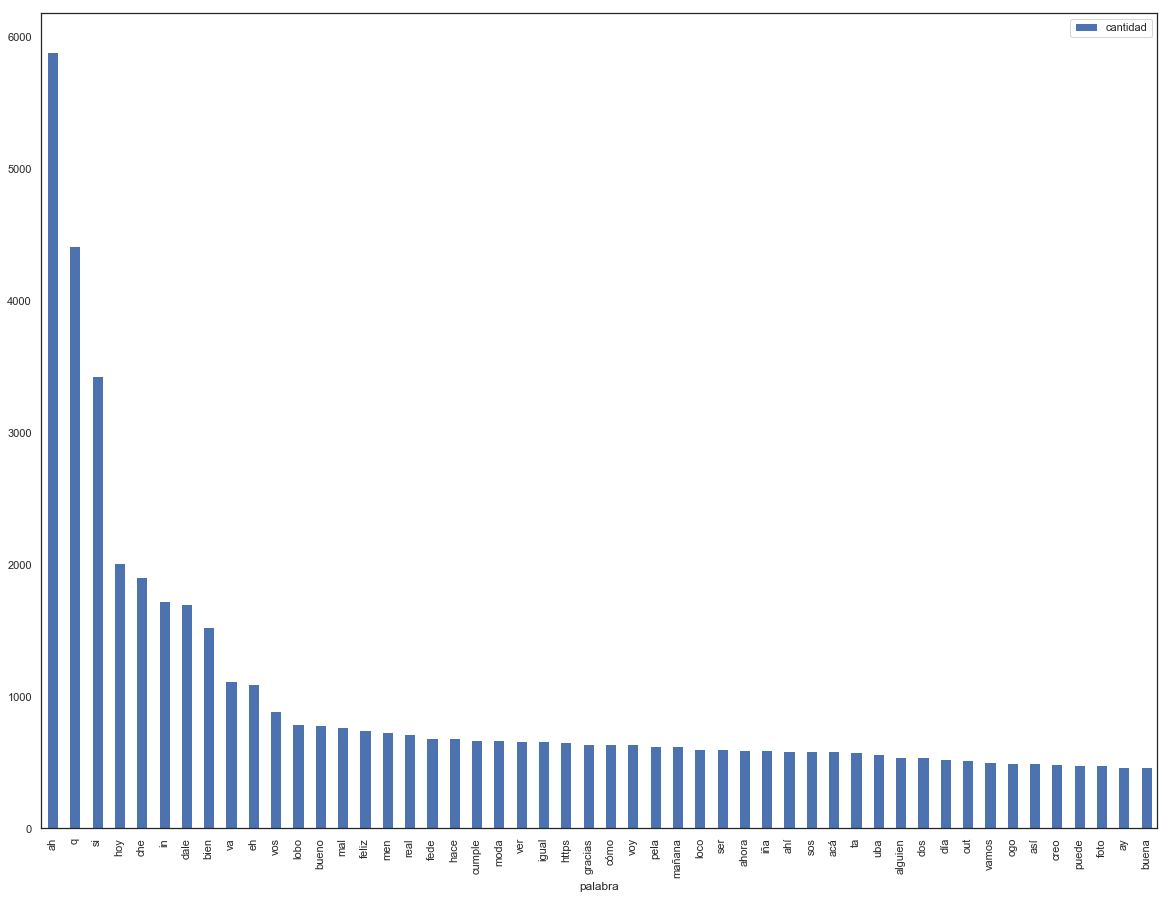

In [38]:
# graph - palabras y su aparición en el texto - las cincuenta mas frecuentes

plt.rcParams['figure.figsize'] = [20, 15]
palabras.groupby('palabra').size().reset_index().rename(columns={0:'cantidad'}).sort_values('cantidad',ascending=False).iloc[:50,:].plot.bar(y='cantidad',x='palabra')

(20.0, 80.0, 20.0, 80.0)

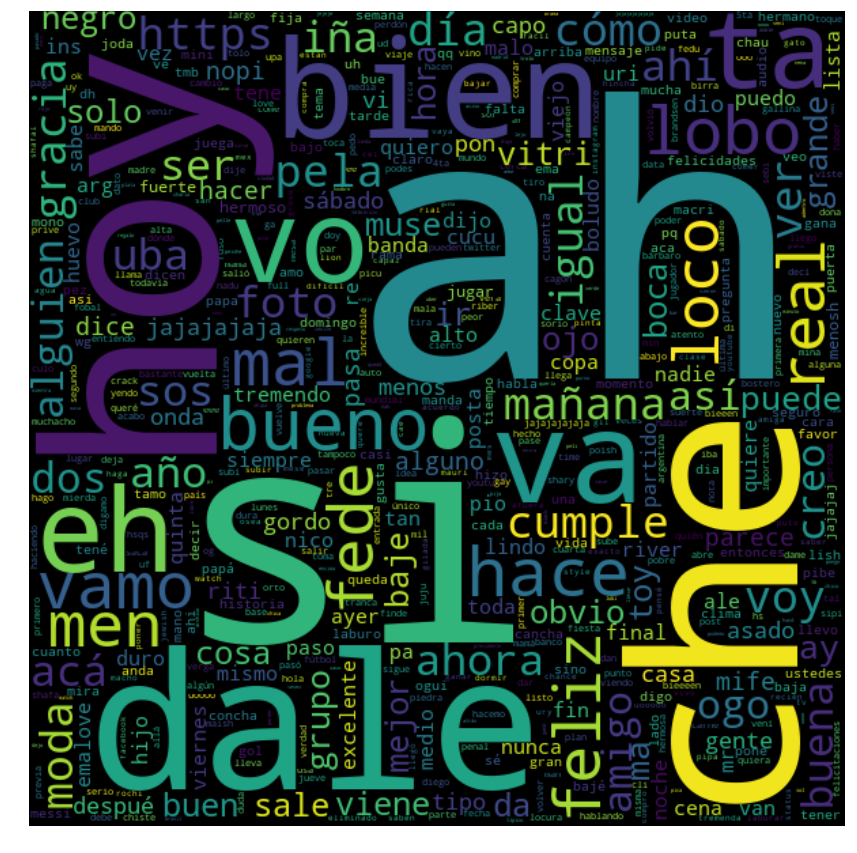

In [185]:
# producimos la nube de palabras

palabrasWC = ' '.join(df_text.flat.apply(lambda x:' '.join(x)))
wordcloud = WordCloud(height=600,width=600,max_words=600,collocations=False, background_color='black').generate(palabrasWC)
plt.imshow(wordcloud, interpolation='bilinear', aspect='equal', extent=(20, 80, 20, 80))
plt.axis("off")

